In [32]:
from pathlib import Path

import numpy
import pandas

path = Path('/home/dom/code/vttHex/software/vtEval')
labels = ['phonemes', 'prosody', 'integration']

def loadFrom(globString, **csvArgs):
    dfs = []
    for f in path.glob(globString):
        df = pandas.read_csv(f, **csvArgs)
        df['src'] = f.name.split('.')[0]
        df['parentSrc'] = f.parent.parent.parent.name

        dfs.append(df)

    df = pandas.concat(dfs, ignore_index=True)
    print(df.groupby('parentSrc').describe())

    return df


In [33]:
# Loudness distributions

loudnessDF = loadFrom('**/*.loudness.csv')
loudnessDF = loudnessDF[loudnessDF.loudness > 1]


                 time                                                         \
                count      mean       std  min       25%       50%       75%   
parentSrc                                                                      
integration   72192.0  1.126993  0.651251  0.0  0.563497  1.126993  1.690490   
phonemes     128663.0  0.435925  0.286601  0.0  0.199782  0.401572  0.635101   
prosody      315839.0  0.901277  0.538973  0.0  0.441885  0.885520  1.329736   

                       loudness                                        \
                  max     count       mean        std  min        25%   
parentSrc                                                               
integration  2.253986   72192.0   5.502921  10.994627  0.0   0.000003   
phonemes     1.411697  128663.0  28.337432  17.080458  0.0  15.589010   
prosody      2.559202  315839.0  25.019191  11.922459  0.0  16.539271   

                                              
                   50%        75%

Text(0.5, 0, 'Loudness (Zwicker Loudness Units)')

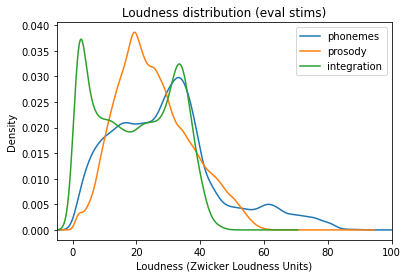

In [81]:
for f in labels:
    ax = loudnessDF[loudnessDF.parentSrc == f].loudness.plot.density()
    
ax.legend(labels)
ax.set_xlim([-5, 100])
ax.set_title('Loudness distribution (eval stims)')
ax.set_xlabel("Loudness (Zwicker Loudness Units)")

In [48]:
pitchesDF = loadFrom('**/*.f0.csv', delimiter='   ', header=None, names=['t', 'f', 'c'])
pitchesDF = pitchesDF[pitchesDF.c > .33]

                    t                                                     \
                count      mean       std  min      25%     50%      75%   
parentSrc                                                                  
integration  144384.0  1.127500  0.651253  0.0  0.56375  1.1275  1.69125   
phonemes     257134.0  0.436638  0.286704  0.0  0.20000  0.4020  0.63600   
prosody      631390.0  0.901924  0.539052  0.0  0.44300  0.8860  1.33100   

                           f              ...                            c  \
               max     count        mean  ...       75%      max     count   
parentSrc                                 ...                                
integration  2.255  144384.0  130.219909  ...  169.4815  922.227  144384.0   
phonemes     1.413  257134.0  172.624569  ...  199.7320  936.939  257134.0   
prosody      2.561  631390.0  113.559553  ...  122.7540  929.243  631390.0   

                                                                    
     

Text(0.5, 0, 'Pitch frequency (Hz)')

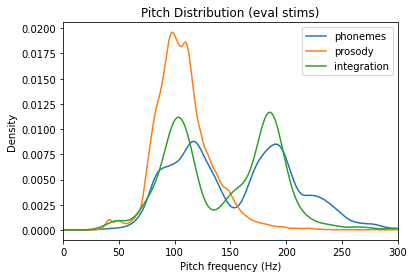

In [82]:
for f in labels:
    ax = pitchesDF[pitchesDF.parentSrc == f].f.plot.density()
    
ax.legend(labels)
ax.set_xlim([0, 300])
ax.set_title('Pitch Distribution (eval stims)')
ax.set_xlabel("Pitch frequency (Hz)")

In [64]:
## Training

trainStimPath = Path('/home/dom/Documents/Dissertation Stimuli/AngelSound/training-collection/wav')

def loadTrain(globString, **csvArgs):
    dfs = []
    for f in trainStimPath.glob(globString):
        df = pandas.read_csv(f, **csvArgs)
        df['src'] = f.name.split('.')[0]
        dfs.append(df)

    return pandas.concat(dfs, ignore_index=True)

trainLoudnessDF = loadTrain('*.loudness.csv')
trainLoudnessDF = trainLoudnessDF[trainLoudnessDF.loudness > 1]
print(trainLoudnessDF.describe())

trainPitch = loadTrain('*.f0.csv', delimiter='   ', header=None, names=['t', 'f', 'c'])
trainPitch = trainPitch[trainPitch.c > .33]
print(trainPitch.describe())

                time       loudness
count  332958.000000  332958.000000
mean        0.422624      18.986003
std         0.255149      10.338503
min         0.003994       1.000038
25%         0.211966      10.414329
50%         0.397518      18.738493
75%         0.597900      26.712526
max         1.362832      54.039818
                   t              f              c
count  470813.000000  470813.000000  470813.000000
mean        0.395234     141.643372       0.738560
std         0.246577      63.257835       0.181532
min         0.000000      30.607000       0.331000
25%         0.196000      80.773000       0.602000
50%         0.363000     152.722000       0.814000
75%         0.563000     187.745000       0.890000
max         1.364000     650.042000       0.958000


Text(0.5, 0, 'Loudness (Zwicker Loudness Units)')

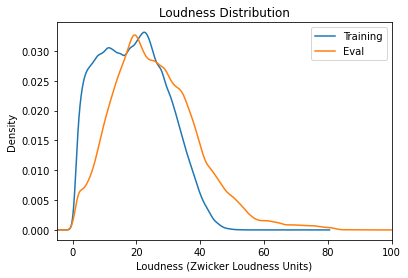

In [83]:
ax = trainLoudnessDF.loudness.plot.density()
ax = loudnessDF.loudness.plot.density()
ax.legend(['Training', 'Eval'])
ax.set_xlim([-5, 100])
ax.set_title('Loudness Distribution')
ax.set_xlabel("Loudness (Zwicker Loudness Units)")

Text(0.5, 0, 'Pitch frequency (Hz)')

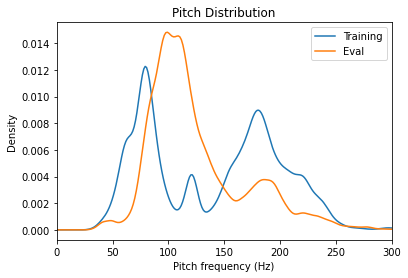

In [86]:
ax = trainPitch.f.plot.density()
ax = pitchesDF.f.plot.density()
ax.legend(['Training', 'Eval'])
ax.set_xlim([0, 300])
ax.set_title('Pitch Distribution')
ax.set_xlabel("Pitch frequency (Hz)")

Text(0.5, 0, 'Pitch frequency (Hz)')

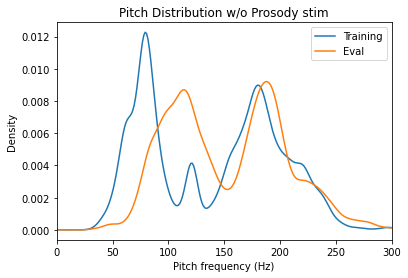

In [87]:
ax = trainPitch.f.plot.density()
ax = pitchesDF[pitchesDF.parentSrc != 'prosody'].f.plot.density()
ax.legend(['Training', 'Eval'])
ax.set_xlim([0, 300])
ax.set_title('Pitch Distribution w/o Prosody stim')
ax.set_xlabel("Pitch frequency (Hz)")

In [ ]:
ax = trainPitch.f.plot.density()
ax = pitchesDF[pitchesDF.parentSrc != 'phonemes'].f.plot.density()
ax.legend(['Training', 'Eval'])
ax.set_xlim([0, 300])
ax.set_title('Pitch Distribution w/o Phonemes stim')
ax.set_xlabel("Pitch frequency (Hz)")